# CA 1: Solving linear equations with Gaussian elimination

| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
|1st February 2017  | **  Tuesday 15th February 2017** |


Submit an electronic copy of your notebook via the  [electronic hand-in system](http://empslocal.ex.ac.uk/submit/).

This CA is <b>formative</b> (the mark will not count toward the final module mark). 




Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the reports

Reports should be handed-in electronically at  <http://empslocal.ex.ac.uk/submit/>.  You just need to submit the single file that is the notebook, so you should be able to upload it directly from the directory on the Blue Room machine.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

In [330]:
# import the numpy package in the np namespace
import numpy  as np

# this line will load the plotting function into the namespace plt.
import matplotlib.pyplot as plt

# the following lines prevent Python from opening new windows for figures. 
%matplotlib inline

## Part 1: Implement Gaussian elimination 
In this part you are asked to implement Gaussian elimination as presented in the lectures. 
It is recommended to implement separate functions for generating the reduced row echelon form, and for solving it. 


Below I have used the method of gaussian elimination discussed in lectures to solve systems of linear equations. 

These could be of the form: $$Ax = B$$

Where $A$ is a square matrix of coefficients, $B$ is a column matrix of constants and $x$ is a column matrix of unknown variables to be solved.

To do this I have:

- Made a function called "reduced_row_echelon" which calculates the reduced row echelon form as an augmented matrix $A|B$. 


- I have then made a function called "solve_echelon" which uses an augmented matrix in reduced row echelon form to solve and produce a column matrix of the unknown variables $x$ to be found.


- Finally i have made a function called "gaussian_elimination" which uses both of the functions above to implement the whole guassian elimination process, allowing users to easily input $A$ and $B$ instantly outputting $x$.

In [331]:

def reduced_row_echelon( A, B ):
    """
    Calculates the reduced row echelon form using two matrices 'A' and 'B'.
    The augmented matrix (A|B) in reduced row echelon form is returned.
    
    Arguments:
    'A': Matrix ceofficient.
    'B': Column matrix of constants.
    
    Caveats:
    'A' must be of square form.
    'B' must have the same number of rows as 'A'.
    """

    #Ensure 'A' is square.
    rows_a, columns_a = np.shape( A )
    assert rows_a == columns_a, 'A is not a square matrix.'

    #Ensure 'B' has 1 column, and same number of rows as 'A'.
    rows_b, columns_b = np.shape( B )
    assert rows_b == rows_a, 'B does not have the same number of rows as A.'

    #Form the augmented matrix.
    augmented_matrix = np.c_[A, B]
    pivot_row = 0

    #Assign the pivot to the next diagonal location, until end of matrix is reached.
    while pivot_row < rows_a:
        pivot = augmented_matrix[pivot_row, pivot_row]

        #Iterate down the pivot column, by accessing the rows.
        for row in range( pivot_row, rows_a ):
            
            if row == pivot_row:    #If diagonal location, make this value 1.
                augmented_matrix[row] /= pivot
                normalised_row = augmented_matrix[row]

            #Otheriwse zero the rest of the elements below.
            else:
                element_to_zero = augmented_matrix[row, pivot_row]
                #Exploit that the normalised row will always have 1 in this column.
                augmented_matrix[row] -= normalised_row*element_to_zero
                
        pivot_row += 1
            
    return augmented_matrix



def solve_echelon( echelon_matrix ):
    """
    Solves a matrix in reduced row echelon form, returning a column matrix of the 
    solved variables.
    
    Arguments:
    'echelon_matrix': The matrix to be solved in reduced row echelon form.
    
    Caveats:
    Only a matrix in reduced row echelon form will function properly.
    (square matrix augmented with a column constant matrix).
    """
    
    #Ensure matrix is of correct echelon shape.
    number_rows, number_columns = np.shape( echelon_matrix )
    assert number_columns == 1 + number_rows, 'The matrix is not in the correct echelon form.'
    
    #Separate the constants matrix from the reduced row echelon.
    constants = echelon_matrix[:,number_rows]
    echelon_matrix = echelon_matrix[:,:number_rows]
    variables = np.matrix( np.zeros( (number_rows, 1) ))    #Initialise variables matrix.
    
    #Iterate over rows, starting at bottom of matrix, finishing at the top.
    for row in range( number_rows - 1, -1, -1 ):
        
        #Immediate assignment for the last row in the matrix.
        if row == number_rows - 1:
            variables[row] = constants[row]
        
        #General case, use matrix product to caluculate the next corresponding unknown variable.
        else:
            variables[row] = constants[row] - echelon_matrix[row, row+1:]*variables[row+1:]
            
    return variables



def gaussian_elimination( A, B ):
    """
    Performs the full guassian elimination algorithm to solve unknown varibles matrix 'x'
    in equation form 'Ax = B'. A column marix of the solved variables is returned.
    
    Arguments:
    Input the matrices 'A' and 'B' corresponding to this equation.
    
    Caveats:
    'A' must be of square form.
    'B' must have only 1 column and the same number of rows as 'A'.
    """
    
    #Calculate the solved variables column matrix.
    solved_variables = solve_echelon( reduced_row_echelon( A, B ) )
    
    return solved_variables



#Example used in lectures:
A = np.matrix([
            [3., 4., 9.],
            [6., 7., 9.],
            [9., 10., 11.]
            ])

B = np.matrix([
            [13.],
            [7.],
            [3.]
            ])

print("Variables [x3, x2, x1] are:\n", gaussian_elimination( A, B ))



Variables [x3, x2, x1] are:
 [[-12.]
 [ 10.]
 [  1.]]


## Part 2: Finding solution to a linear problem
In this part, you will be asked to use the functions you have implemented in part 1 to solve a simple problem. 

<b>Problem statement</b> 
You want to find a linear transformation by a set of points before and after the transformation.

2a) try with the following set of points

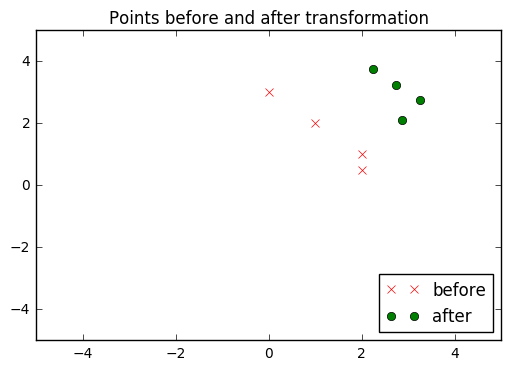

In [332]:
def show_before_after(x,y): 
    plt.plot(x[:,0], x[:,1], 'rx', y[:,0], y[:,1], 'go')
    plt.ylim([-5,5])
    plt.xlim([-5,5])
    plt.legend(('before', 'after'), loc=4)
    plt.title('Points before and after transformation')


# matrix of points before transformation, one point per row
x = np.matrix(
[[ 1.,   2. ],
 [ 2.,   1. ],
 [ 0.,   3. ],
 [ 2.,   0.5]])

# matrix of points after transformation, one point per row
y = np.matrix(
[[ 2.75,   3.25 ],
 [ 3.25,   2.75 ],
 [ 2.25,   3.75 ],
 [ 2.875,  2.125]])

show_before_after(x,y)
plt.show()

We have here a problem of the form $Ax = B$, where $A$ is the transformation matrix to be found, $x$ is a matrix of points before transformation, and $B$ is a matrix of the points after the transformation. 
From looking at this problem I can see two immediate methods I could implement utilising the functions I have already made.


Method 1) Using diagonalisation to calculate inverse.

By taking the first two points, I could say that:
$$x = 
 \begin{pmatrix}
  1 & 2 \\
  2 & 1
  \end{pmatrix}$$
 and hence: 
 $$B = 
  \begin{pmatrix}
  2.75 & 3.25 \\
  3.25 & 2.75
 \end{pmatrix}$$ 

In [333]:
#Initialise x
x = np.matrix([
            [1., 2.],
            [2., 1.]
            ])

#Initialise B
B = np.matrix([
            [2.75, 3.25],
            [3.25, 2.75]
            ])

To find $A$, I could rearrange to formulate $A = Bx^{-1}$. So I need to calculate $x^{-1}$. This can be achieved by formulating the augmented matrix between $x$ and it's identity matrix:
$$[A|I] = \begin{pmatrix}
  1 & 2 \\
  2 & 1
  \end{pmatrix}
  |
  \begin{pmatrix}
  1 & 0 \\
  0 & 1
  \end{pmatrix}$$

In [334]:
identity = np.matrix([
            [1., 0.],
            [0., 1.,]
             ])

I then need to use operations to transform the left hand of the augmented matrix into the identity matrix, this will calculate $x^{-1}$ on the right hand side. I can use my "reduced_row_echelon" function to transform the left hand side into a reduced row echelon. I can then easily follow this up with a simple elementary row operation to produce the identity matrix as follows:

In [335]:
#Convert to echelon form.
augmented = reduced_row_echelon( x, identity )
print("Echelon form: \n", augmented, "\n")

#Convert to Identity form with an elementary row operation.
augmented[0] -= augmented[1]*augmented[0, 1]
print("Identity form:\n", augmented, "\n")

Echelon form: 
 [[ 1.          2.          1.          0.        ]
 [-0.          1.          0.66666667 -0.33333333]] 

Identity form:
 [[ 1.          0.         -0.33333333  0.66666667]
 [-0.          1.          0.66666667 -0.33333333]] 



Now the right hand side is $x^{-1}$. Therefore the final operation to find the transformation matrix $A$ is to perform a matrix product between $B$ and $x^{-1}$:

In [336]:
#Discard the left hand side identity matrix.
x_inverse = augmented[:,2:4]
print("Inverse of x:\n", x_inverse, "\n")

#Perform the matrix product between x inverse, and B.
transformation = B*x_inverse
print("Transformation:\n", transformation)

Inverse of x:
 [[-0.33333333  0.66666667]
 [ 0.66666667 -0.33333333]] 

Transformation:
 [[ 1.25  0.75]
 [ 0.75  1.25]]


And so from above, I can conclude the transformation matrix ($A$) is:

 $$A = 
  \begin{pmatrix}
  1.25 & 0.75 \\
  0.75 & 1.25
 \end{pmatrix}$$ 

Method 2) Simultaneous equation solving, (utilising both my functions).

By assuming that the linear transformation matrix is 2x2, this can be modelled as follows:

$$\begin{pmatrix}
  a & b \\
  c & d
  \end{pmatrix}$$
  
By performing matrix product on each of the first sets of points, and equalling to the corresponding transformed points I can reduce down a set of simultaneous equations that can be used to solve the variables in the matrix:

$3a + 3b = 6$

$2a + 3.5b = 5.125$

$3c + 3d = 6$

$2c + 3.5d = 5.875$

I can formulate this problem using matrices:

Solving for $a$ and $b$:
$$\begin{pmatrix}
  3 & 3 \\
  2 & 3.5
  \end{pmatrix}
  \begin{pmatrix}
  a \\
  b
  \end{pmatrix}
  =
  \begin{pmatrix}
  6 \\
  5.125
  \end{pmatrix}$$
  
Solving for $c$ and $d$:
$$\begin{pmatrix}
  3 & 3 \\
  2 & 3.5
  \end{pmatrix}
  \begin{pmatrix}
  c \\
  d
  \end{pmatrix}
  =
  \begin{pmatrix}
  6 \\
  5.875
  \end{pmatrix}$$
  
  I implement this below:

In [337]:
ab_coefficients = np.matrix([
            [3., 3.],
            [2., 3.5,]
             ])
ab_constants = np.matrix([
            [6.],
            [5.125]
             ])

cd_coefficients = np.matrix([
            [3., 3.],
            [2., 3.5,]
             ])
cd_constants = np.matrix([
            [6.],
            [5.875]
             ])

#Perform the full gaussian elimination.
ab = gaussian_elimination( ab_coefficients, ab_constants )
cd = gaussian_elimination( cd_coefficients, cd_constants )

print("a and b solutions: \n", ab, "\n")
print("c and d solutions: \n", cd, "\n")

#construct the transformation matrix from the answers.
transformation = np.vstack( [ab.T, cd.T] )
print("transformation:\n", 
      transformation)

a and b solutions: 
 [[ 1.25]
 [ 0.75]] 

c and d solutions: 
 [[ 0.75]
 [ 1.25]] 

transformation:
 [[ 1.25  0.75]
 [ 0.75  1.25]]


I get the same result as method 1. This method is arguably simpler and utilises both functions.

$$\begin{pmatrix}
  a & b \\
  c & d
  \end{pmatrix}
  =
  \begin{pmatrix}
  1.25 & 0.75 \\
  0.75 & 1.25
  \end{pmatrix}$$


2b) Test your approach on the following points. Explain what happens. 

In [338]:
x1 = [
 [ 1,  2],
 [ 2,  4],
 [-1, -2],
 [ 0,  0]]
y1 = [
 [ 5, 10],
 [10, 20],
 [-1, -2],
 [-2, -4]]

In [339]:
#Initialise x
x = np.matrix([
            [1., 2.],
            [2., 4.]
            ])

#Initialise B
B = np.matrix([
            [5., 10.],
            [10., 20.]
            ])

identity = np.matrix([
            [1., 0.],
            [0., 1.,]
             ])

print(reduced_row_echelon( x, identity ))

[[  1.   2.   1.   0.]
 [ nan  nan -inf  inf]]


C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning: invalid value encountered in true_divide


Here we can see that attempting to perform the same method on these points will not work, this is because none of them exhibit linear independance. all the points can be scaled to form the next (apart from 0,0), and so a tranformation is not possible to be found here using these methods.